## Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

## Generate Random World Cities

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

## Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters

In [6]:
# Import the requests library.
import requests

## Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8d3fe34a1634f05652b89a64616ae194


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL

In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   


Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | northam
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | kaberamaido
Processing Record 7 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 8 of Set 1 | nizhniy baskunchak
Processing Record 9 of Set 1 | cherskiy
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | verkhniy baskunchak
Processing R

Processing Record 36 of Set 4 | casablanca
Processing Record 37 of Set 4 | naze
Processing Record 38 of Set 4 | arman
Processing Record 39 of Set 4 | walvis bay
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | barbar
City not found. Skipping...
Processing Record 42 of Set 4 | batagay-alyta
Processing Record 43 of Set 4 | shenkursk
Processing Record 44 of Set 4 | kayes
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | havre-saint-pierre
Processing Record 47 of Set 4 | xining
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | gangotri
City not found. Skipping...
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | maridi
Processing Record 2 of Set 5 | ostrovnoy
Processing Record 3 of Set 5 | moree
Processing Record 4 of Set 5 | bubaque
Processing Record 5 of Set 5 | darlawn
Processing Record 6 of Set 5 | chara
Processing Record 7 of Set 5 | hokitika
Processing Record 8 of Set 5 | tura
Processing Reco

Processing Record 23 of Set 8 | rio gallegos
Processing Record 24 of Set 8 | carballo
Processing Record 25 of Set 8 | artyk
City not found. Skipping...
Processing Record 26 of Set 8 | henties bay
Processing Record 27 of Set 8 | filadelfia
Processing Record 28 of Set 8 | aklavik
Processing Record 29 of Set 8 | uzhur
Processing Record 30 of Set 8 | bababe
City not found. Skipping...
Processing Record 31 of Set 8 | hithadhoo
Processing Record 32 of Set 8 | gua musang
Processing Record 33 of Set 8 | san jose
Processing Record 34 of Set 8 | la palma
Processing Record 35 of Set 8 | medvezhyegorsk
Processing Record 36 of Set 8 | fuyu
Processing Record 37 of Set 8 | khatra
Processing Record 38 of Set 8 | takanabe
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | port moresby
Processing Record 41 of Set 8 | mega
Processing Record 42 of Set 8 | te anau
Processing Record 43 of Set 8 | port hardy
Processing Record 44 of Set 8 | namibe
Processing Re

Processing Record 13 of Set 12 | nanakuli
Processing Record 14 of Set 12 | camopi
Processing Record 15 of Set 12 | prince rupert
Processing Record 16 of Set 12 | zelenokumsk
Processing Record 17 of Set 12 | raga
Processing Record 18 of Set 12 | nemuro
Processing Record 19 of Set 12 | chadiza
Processing Record 20 of Set 12 | kashi
Processing Record 21 of Set 12 | uige
Processing Record 22 of Set 12 | khandyga
Processing Record 23 of Set 12 | tuy hoa
Processing Record 24 of Set 12 | utiroa
City not found. Skipping...
Processing Record 25 of Set 12 | dawei
Processing Record 26 of Set 12 | longyan
Processing Record 27 of Set 12 | roma
Processing Record 28 of Set 12 | aguilas
Processing Record 29 of Set 12 | troitsko-pechorsk
Processing Record 30 of Set 12 | havoysund
Processing Record 31 of Set 12 | ordzhonikidze
Processing Record 32 of Set 12 | carutapera
Processing Record 33 of Set 12 | port macquarie
Processing Record 34 of Set 12 | kirakira
Processing Record 35 of Set 12 | kalevala
Pro

In [10]:
len(city_data)

559

## Create a DataFrame of City Weather Data

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,48.99,97,98,5.01,NZ,2021-04-21 21:15:42
1,Nanortalik,60.1432,-45.2371,38.28,76,100,5.66,GL,2021-04-21 21:15:43
2,Northam,51.0333,-4.2167,50.00,74,12,4.00,GB,2021-04-21 21:15:43
3,Port Alfred,-33.5906,26.8910,70.61,81,69,12.24,ZA,2021-04-21 21:15:44
4,Hermanus,-34.4187,19.2345,66.00,85,22,8.01,ZA,2021-04-21 21:13:11
5,Kaberamaido,1.7389,33.1594,67.78,91,100,3.98,UG,2021-04-21 21:15:44
6,Nizhniy Baskunchak,48.2198,46.8311,50.38,84,33,4.74,RU,2021-04-21 21:15:45
7,Cherskiy,68.7500,161.3000,30.38,70,100,20.54,RU,2021-04-21 21:15:45
8,Rikitea,-23.1203,-134.9692,78.26,71,15,11.70,PF,2021-04-21 21:15:46
9,Hobart,-42.8794,147.3294,52.00,58,40,11.50,AU,2021-04-21 21:11:47


In [12]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-04-21 21:15:42,-46.6000,168.3333,48.99,97,98,5.01
1,Nanortalik,GL,2021-04-21 21:15:43,60.1432,-45.2371,38.28,76,100,5.66
2,Northam,GB,2021-04-21 21:15:43,51.0333,-4.2167,50.00,74,12,4.00
3,Port Alfred,ZA,2021-04-21 21:15:44,-33.5906,26.8910,70.61,81,69,12.24
4,Hermanus,ZA,2021-04-21 21:13:11,-34.4187,19.2345,66.00,85,22,8.01
5,Kaberamaido,UG,2021-04-21 21:15:44,1.7389,33.1594,67.78,91,100,3.98
6,Nizhniy Baskunchak,RU,2021-04-21 21:15:45,48.2198,46.8311,50.38,84,33,4.74
7,Cherskiy,RU,2021-04-21 21:15:45,68.7500,161.3000,30.38,70,100,20.54
8,Rikitea,PF,2021-04-21 21:15:46,-23.1203,-134.9692,78.26,71,15,11.70
9,Hobart,AU,2021-04-21 21:11:47,-42.8794,147.3294,52.00,58,40,11.50


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Scatter Plots of Weather Data

### Get Data for Plotting

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#### Scatter Plot for Latitude vs. Max Temperature

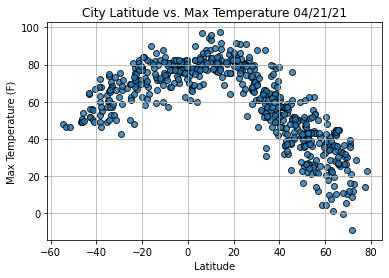

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

#### Scatter Plot for Latitude vs. Humidity

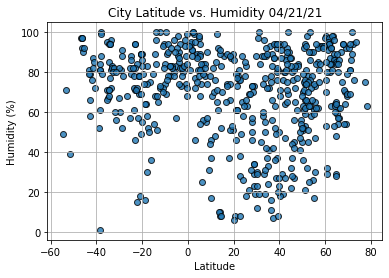

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

#### Scatter Plot for Latitude vs Cloudiness

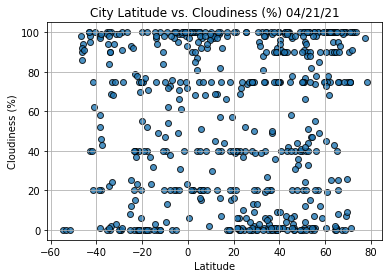

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

#### Scatter Plot for Latitude vs. Wind Speed

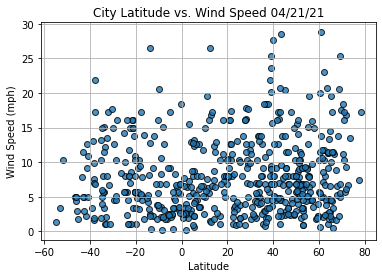

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

## Determine Correlations

### Find the Correlation Between Latitude and Maximum Temperature

#### Create a Linear Regression Function

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

#### Create the Hemisphere DataFrames

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nanortalik,GL,2021-04-21 21:15:43,60.1432,-45.2371,38.28,76,100,5.66
2,Northam,GB,2021-04-21 21:15:43,51.0333,-4.2167,50.00,74,12,4.00
5,Kaberamaido,UG,2021-04-21 21:15:44,1.7389,33.1594,67.78,91,100,3.98
6,Nizhniy Baskunchak,RU,2021-04-21 21:15:45,48.2198,46.8311,50.38,84,33,4.74
7,Cherskiy,RU,2021-04-21 21:15:45,68.7500,161.3000,30.38,70,100,20.54


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

#### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

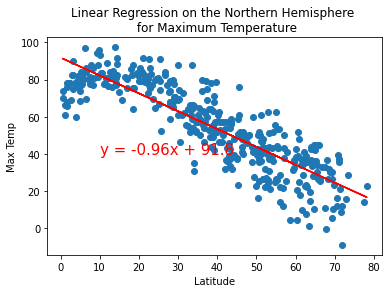

In [39]:
# Linear regression on the Northern Hemisphere
plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature')
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Max Temp',(10,40))



#### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

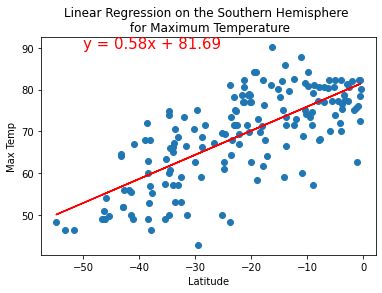

In [40]:
# Linear regression on the Southern Hemisphere
plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature')
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Max Temp',(-50,90))

### Find the Correlation Between Latitude and Percent Humidity

#### Perform Linear Regression on the Percentage of Humidity for the Northern Hemisphere

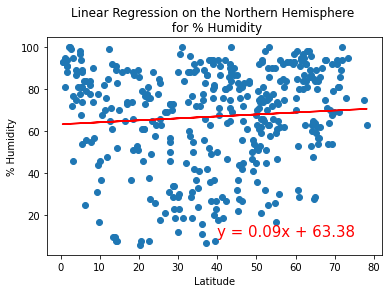

In [41]:
# Linear regression on the Northern Hemisphere
plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity')
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, '% Humidity',(40,10))

#### Perform Linear Regression on the Percentage Humidity for the Southern Hemisphere

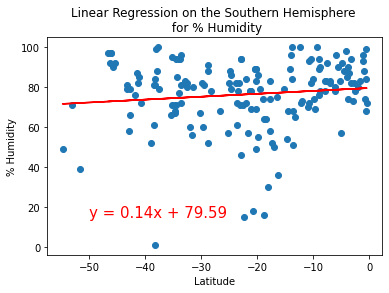

In [42]:
# Linear regression on the Southern Hemisphere
plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity')
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, '% Humidity',(-50,15))

### Find the Correlation Between Latitude and Percent Cloudiness

#### Perform Linear Regression on Percentage of Cloudiness for the Northern Hemisphere

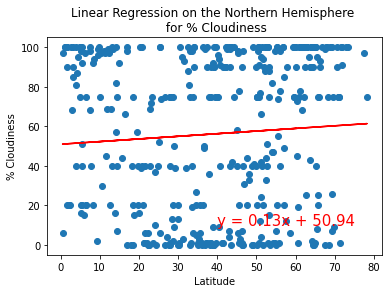

In [43]:
# Linear regression on the Northern Hemisphere
plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness')
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, '% Cloudiness',(40,10))

#### Perform Linear Regression on Percentage of Cloudiness for the Southern Hemisphere

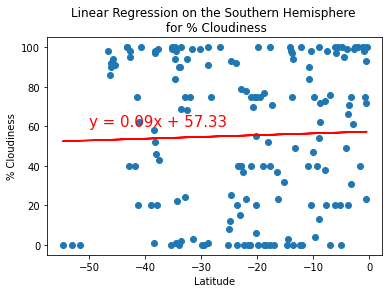

In [45]:
# Linear regression on the Southern Hemisphere
plt.title('Linear Regression on the Southern Hemisphere \n for % Cloudiness')
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values, '% Cloudiness', (-50,60))

### Find the Correlation Between Latitude and Wind Speed

#### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

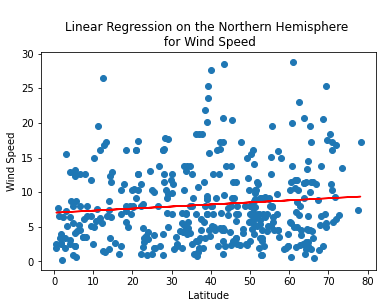

In [46]:
# Linear regression on the Northern Hemisphere
plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed')
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Wind Speed',(40,35))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

In [ ]:
import numpy as np 
from sklearn import datasets
from sklearn import linear_model
import statsmodels.api as sm 

# Linear regression on the Southern Hemisphere
plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed')
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Wind Speed',(-50,35))

print(linear_model.summary(x, y,))